In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#we have data of:
# -Deaths
# -Confirmed
# -Infected
# Recovered = Confirmed - Infected - Deaths

In [3]:
df_recovered = pd.read_csv('database/time_series_covid19_recovered_global.csv')
df_death = pd.read_csv('database/time_series_covid19_deaths_global.csv')
df_confirmed = pd.read_csv('database/time_series_covid19_confirmed_global.csv')

In [4]:
def get_rr(dR,I):
    """
    from SIR model, dR/dt = rr * I 
    rr = (dR/dt) / I
    """
    return dR/I

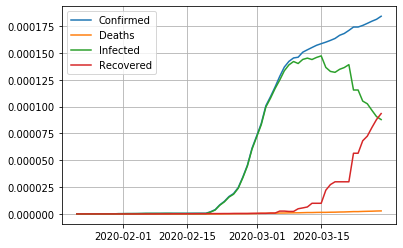

In [5]:
#Data from 25 FEB a 25 MAR, donde se puede apreciar los efectos precuarentena
start = pd.Timestamp('2020-01-22')
end = pd.Timestamp('2020-03-28')
t = np.linspace(start.value, end.value, 67)
t = pd.to_datetime(t).date
t = np.asarray(t)

country = 'Korea, South'
N = 51470000 #population

confirmed = df_confirmed[df_confirmed['Country/Region'] == country][df_confirmed.columns[4:]].values
recovered = df_recovered[df_recovered['Country/Region'] == country][df_recovered.columns[4:]].values
deaths = df_death[df_death['Country/Region'] == country][df_death.columns[4:]].values
oficial_infected = confirmed - deaths - recovered
real_infected = oficial_infected 
subsceptible = N - confirmed 

oficial_infected_unit = oficial_infected / N
subsceptible_unit = subsceptible / N
confirmed_unit = confirmed / N
recovered_unit = recovered / N
deaths_unit = deaths / N

plt.plot(t,confirmed_unit.reshape(-1),label='Confirmed')
plt.plot(t,deaths_unit.reshape(-1),label='Deaths')
plt.plot(t,oficial_infected_unit.reshape(-1),label='Infected')
plt.plot(t,recovered_unit.reshape(-1),label='Recovered')

plt.legend()
plt.grid()
plt.show()

In [9]:
recovered_unit = recovered_unit.reshape(-1)

rr_vector = []
for i in range(len(recovered_unit)-1):
    dr = recovered_unit[i+1]-recovered_unit[i]
    rr = get_rr(dr, recovered_unit[i])
    rr_vector.append(rr)

mean = np.nanmean(rr_vector[-10:])
std = np.nanstd(rr_vector[-10:])

print('Korea, South')
print('rr = {} +- {} '.format(mean,std))

Korea, South
rr = 0.14242731242498682 +- 0.25661456260898335 


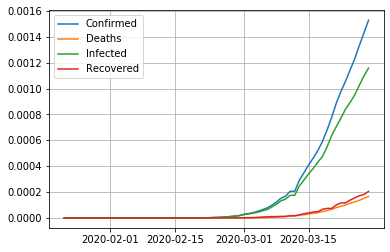

In [10]:
#Data from 25 FEB a 25 MAR, donde se puede apreciar los efectos precuarentena
start = pd.Timestamp('2020-01-22')
end = pd.Timestamp('2020-03-28')
t = np.linspace(start.value, end.value, 67)
t = pd.to_datetime(t).date
t = np.asarray(t)

country = 'Italy'
N = 60480000 #population

confirmed = df_confirmed[df_confirmed['Country/Region'] == country][df_confirmed.columns[4:]].values
recovered = df_recovered[df_recovered['Country/Region'] == country][df_recovered.columns[4:]].values
deaths = df_death[df_death['Country/Region'] == country][df_death.columns[4:]].values
oficial_infected = confirmed - deaths - recovered
real_infected = oficial_infected * 15
subsceptible = N - confirmed * 15

oficial_infected_unit = oficial_infected / N
subsceptible_unit = subsceptible / N
confirmed_unit = confirmed / N
recovered_unit = recovered / N
deaths_unit = deaths / N

plt.plot(t,confirmed_unit.reshape(-1),label='Confirmed')
plt.plot(t,deaths_unit.reshape(-1),label='Deaths')
plt.plot(t,oficial_infected_unit.reshape(-1),label='Infected')
plt.plot(t,recovered_unit.reshape(-1),label='Recovered')

plt.legend()
plt.grid()
plt.show()

In [11]:
recovered_unit = recovered_unit.reshape(-1)

rr_vector = []
for i in range(len(recovered_unit)-1):
    dr = recovered_unit[i+1]-recovered_unit[i]
    rr = get_rr(dr, recovered_unit[i])
    rr_vector.append(rr)

mean = np.nanmean(rr_vector[-10:])
std = np.nanstd(rr_vector[-10:])

print('Italy')
print('rr = {} +- {} '.format(mean,std))

Italy
rr = 0.12317670311289637 +- 0.10010218366973425 


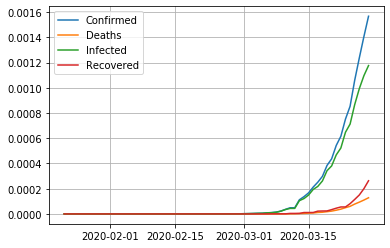

In [12]:
#Data from 25 FEB a 25 MAR, donde se puede apreciar los efectos precuarentena
start = pd.Timestamp('2020-01-22')
end = pd.Timestamp('2020-03-28')
t = np.linspace(start.value, end.value, 67)
t = pd.to_datetime(t).date
t = np.asarray(t)

country = 'Spain'
N = 46700000 #population

confirmed = df_confirmed[df_confirmed['Country/Region'] == country][df_confirmed.columns[4:]].values
recovered = df_recovered[df_recovered['Country/Region'] == country][df_recovered.columns[4:]].values
deaths = df_death[df_death['Country/Region'] == country][df_death.columns[4:]].values
oficial_infected = confirmed - deaths - recovered
real_infected = oficial_infected * 20
subsceptible = N - confirmed * 20

oficial_infected_unit = oficial_infected / N
subsceptible_unit = subsceptible / N
confirmed_unit = confirmed / N
recovered_unit = recovered / N
deaths_unit = deaths / N

plt.plot(t,confirmed_unit.reshape(-1),label='Confirmed')
plt.plot(t,deaths_unit.reshape(-1),label='Deaths')
plt.plot(t,oficial_infected_unit.reshape(-1),label='Infected')
plt.plot(t,recovered_unit.reshape(-1),label='Recovered')

plt.legend()
plt.grid()
plt.show()

In [13]:
recovered_unit = recovered_unit.reshape(-1)

rr_vector = []
for i in range(len(recovered_unit)-1):
    dr = recovered_unit[i+1]-recovered_unit[i]
    rr = get_rr(dr, recovered_unit[i])
    rr_vector.append(rr)

mean = np.nanmean(rr_vector[-5:])
std = np.nanstd(rr_vector[-5:])

print('Spain')
print('rr = {} +- {} '.format(mean,std))

Spain
rr = 0.36836771307257027 +- 0.06510426954895365 


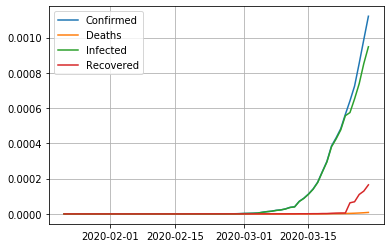

In [14]:
#Data from 25 FEB a 25 MAR, donde se puede apreciar los efectos precuarentena
start = pd.Timestamp('2020-01-22')
end = pd.Timestamp('2020-03-28')
t = np.linspace(start.value, end.value, 67)
t = pd.to_datetime(t).date
t = np.asarray(t)

country = 'Germany'
N = 51470000 #population

confirmed = df_confirmed[df_confirmed['Country/Region'] == country][df_confirmed.columns[4:]].values
recovered = df_recovered[df_recovered['Country/Region'] == country][df_recovered.columns[4:]].values
deaths = df_death[df_death['Country/Region'] == country][df_death.columns[4:]].values
oficial_infected = confirmed - deaths - recovered
real_infected = oficial_infected 
subsceptible = N - confirmed 

oficial_infected_unit = oficial_infected / N
subsceptible_unit = subsceptible / N
confirmed_unit = confirmed / N
recovered_unit = recovered / N
deaths_unit = deaths / N

plt.plot(t,confirmed_unit.reshape(-1),label='Confirmed')
plt.plot(t,deaths_unit.reshape(-1),label='Deaths')
plt.plot(t,oficial_infected_unit.reshape(-1),label='Infected')
plt.plot(t,recovered_unit.reshape(-1),label='Recovered')

plt.legend()
plt.grid()
plt.show()

Korea, South
rr = 0.14242731242498682 +- 0.25661456260898335 

Italy
rr = 0.12317670311289637 +- 0.10010218366973425 

Spain
rr = 0.36836771307257027 +- 0.06510426954895365 